In [ ]:
!pip install numpy opencv-python keras scikit-image matplotlib
!pip install scikit-image opencv-python

**1. IMPORT PACKAGES**

*# check packages versions*

In [ ]:
# Check package versions
import sys
import keras
import cv2
import numpy
import matplotlib
import skimage

print('Python:', sys.version)
print('Keras:', keras.__version__)
print('OpenCV:', cv2.__version__)
print('NumPy:', numpy.__version__)
print('Matplotlib:', matplotlib.__version__)
print('Scikit-Image:', skimage.__version__)

Python: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Keras: 3.5.0
OpenCV: 4.10.0
NumPy: 1.26.4
Matplotlib: 3.8.0
Scikit-Image: 0.24.0


*Import the necessary packages*

In [ ]:
import sys
import keras
import cv2
import numpy as np
import math
import os
from google.colab import drive
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
# import compare_ssim from skimage.metrics instead of skimage.measure
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

**2. IMAGE QUALITY METRICS**

**2.1. PSNR (PEAK SIGNAL-TO-NOISE RATIO)**

*# define a function for peak signal-to-noise ratio (PSNR)*

In [ ]:
# Image Quality Metrics
def psnr(target, ref):
    # assume RGB image
    target_data = target.astype(float)
    ref_data = ref.astype(float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(np.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)

**2.2. MSE  (MEAN SQUARED ERROR)**

*# define function for mean squared error (MSE)*

In [ ]:
def mse(target, ref):
    # the MSE between the two images is the sum of the squared difference between the two images
    err = np.sum((target.astype('float') - ref.astype('float')) ** 2)
    err /= float(target.shape[0] * target.shape[1])

    return err

**2.3 SSIM (STRUCTURAL SIMILAR INDEX)**

*# define function that combines all three image quality metrics*

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))

    # Đặt win_size nhỏ hơn hoặc bằng chiều nhỏ nhất của ảnh nếu ảnh quá nhỏ
    min_side = min(target.shape[0], target.shape[1])
    win_size = 3 if min_side < 7 else 7  # Đặt giá trị nhỏ nhất là 3 nếu ảnh nhỏ hơn 7x7

    scores.append(ssim(target, ref, channel_axis=-1, win_size=win_size))

    return scores

# Khởi tạo các danh sách để lưu trữ chỉ số PSNR của các phương pháp
psnr_original = []
psnr_srcnn = []
psnr_sc = []
psnr_bicubic = []


**3. PREPARING IMAGES**

*# prepare degraded images by introducing quality distortions via resizing*

In [ ]:
# Preparing Images

drive.mount('/content/drive')

source = '/content/drive/MyDrive/SRCNN/source/'

images = '/content/drive/MyDrive/SRCNN/images/'

def prepare_images(path, factor):
    for file in os.listdir(path):

        # open the file
        img = cv2.imread(os.path.join(path, file))

        # find old and new image dimensions
        h, w, _ = img.shape
        new_height = h // factor
        new_width = w // factor

        # resize the image - down
        img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

        # resize the image - up
        img = cv2.resize(img, (w, h), interpolation=cv2.INTER_LINEAR)

        # save the image
        print('Saving {}'.format(file))

        #cv2.imwrite('images/{}'.format(file), img)
        cv2.imwrite(os.path.join(images, file), img)

prepare_images(source, 2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saving coastguard.bmp
Saving flowers.bmp
Saving lenna.bmp
Saving zebra.bmp
Saving foreman.bmp
Saving monarch.bmp
Saving pepper.bmp
Saving man.bmp
Saving bridge.bmp
Saving face.bmp
Saving barbara.bmp
Saving ppt3.bmp
Saving baboon.bmp
Saving comic.bmp
Saving butterfly_GT.bmp
Saving bird_GT.bmp
Saving head_GT.bmp
Saving baby_GT.bmp
Saving woman_GT.bmp


**4. TESTING LOW-RESOLUTION IMAGES**

*# test the generated images using the image quality metrics*

In [ ]:
# Testing Low-Resolution Images

for file in os.listdir(images):

    #target = cv2.imread(os.path.join(images, file))
    #ref = cv2.imread(os.path.join(source, file))

    target_path = os.path.join(images, file)
    ref_path = os.path.join(source, file)

    target = cv2.imread(target_path)
    ref = cv2.imread(ref_path)

    scores = compare_images(target, ref)

    print('{}\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(file, scores[0], scores[1], scores[2]))

coastguard.bmp
PSNR: 27.161600663887082
MSE: 125.00295928030303
SSIM: 0.756950063354931

flowers.bmp
PSNR: 27.454504805386147
MSE: 116.85031307550645
SSIM: 0.8697286286974628

lenna.bmp
PSNR: 31.47349297867539
MSE: 46.316001892089844
SSIM: 0.8460989200521499

zebra.bmp
PSNR: 27.90984063932951
MSE: 105.21951531762727
SSIM: 0.8911656209329116

foreman.bmp
PSNR: 30.14456532664372
MSE: 62.89611610900673
SSIM: 0.933268417388899

monarch.bmp
PSNR: 30.196242365288896
MSE: 62.15214538574219
SSIM: 0.9439574293434104

pepper.bmp
PSNR: 29.88947161686106
MSE: 66.70113118489583
SSIM: 0.8357937568464359

man.bmp
PSNR: 27.226463697988216
MSE: 123.1498794555664
SSIM: 0.8214950645456561

bridge.bmp
PSNR: 25.850528790115554
MSE: 169.05479049682617
SSIM: 0.7804245912255268

face.bmp
PSNR: 30.99220650287191
MSE: 51.74396572848841
SSIM: 0.8008439492289884

barbara.bmp
PSNR: 25.906629837568126
MSE: 166.8850284529321
SSIM: 0.8098632646406401

ppt3.bmp
PSNR: 24.84926168950471
MSE: 212.88947546375275
SSIM: 0.9

**5. BUILDING THE SRCNN MODEL**

*# define the SRCNN model*

In [ ]:
# Building the SRCNN Model
def model():
    SRCNN = Sequential()

    SRCNN.add(Conv2D(filters=128, kernel_size=(9, 9), kernel_initializer='glorot_uniform',
                     activation='relu', padding='valid', use_bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='glorot_uniform',
                     activation='relu', padding='same', use_bias=True))
    SRCNN.add(Conv2D(filters=1, kernel_size=(5, 5), kernel_initializer='glorot_uniform',
                     activation='linear', padding='valid', use_bias=True))

    # Change 'lr' to 'learning_rate'
    adam = Adam(learning_rate=0.0003)

    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])

    return SRCNN

**6. DEPLOYING THE SRCNN**

*# define necessary image processing functions*

In [ ]:
# Deploying the SRCNN
def modcrop(img, scale):
    tmpsz = img.shape
    sz = tmpsz[0:2]
    sz = sz - np.mod(sz, scale)
    img = img[0:sz[0], 0:sz[1]]
    return img

def shave(image, border):
    img = image[border:-border, border:-border]
    return img

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict(image_path):
    # Load the SRCNN model with weights
    srcnn = model()
    srcnn.load_weights('/content/drive/MyDrive/SRCNN/91-image_x2.h5')

    # Load the degraded image
    degraded = cv2.imread(image_path)
    if degraded is None:
        print("Không thể load ảnh:", image_path)
        return None, None, None, None

    # Check for reference image in source folder
    path, file = os.path.split(image_path)
    ref_path = '/content/drive/MyDrive/SRCNN/source/{}'.format(file)

    # Kiểm tra lại đường dẫn ảnh gốc
    print("Đường dẫn ảnh gốc:", ref_path)

    # Kiểm tra nếu ảnh gốc tồn tại
    if not os.path.exists(ref_path):
        print("Không thể tìm thấy ảnh gốc:", ref_path)
        return None, None, None, None

    # Load the reference image
    ref = cv2.imread(ref_path)
    if ref is None:
        print("Không thể load ảnh gốc:", ref_path)
        return None, None, None, None

    # Preprocess the image with modcrop
    ref = modcrop(ref, 3)
    degraded = modcrop(degraded, 3)

    # Convert the image to YCrCb (SRCNN is trained on Y channel)
    temp = cv2.cvtColor(degraded, cv2.COLOR_BGR2YCrCb)

    # Create image slice and normalize
    Y = np.zeros((1, temp.shape[0], temp.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = temp[:, :, 0].astype(float) / 255

    # Perform super-resolution with SRCNN
    pre = srcnn.predict(Y, batch_size=1)

    # Post-process output
    pre *= 255
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(np.uint8)

    # Copy Y channel back to image and convert to BGR
    temp = shave(temp, 6)
    temp[:, :, 0] = pre[0, :, :, 0]
    output = cv2.cvtColor(temp, cv2.COLOR_YCrCb2BGR)

    # Remove border from reference and degraded images
    ref = shave(ref.astype(np.uint8), 6)
    degraded = shave(degraded.astype(np.uint8), 6)

    # Image quality calculations (PSNR, MSE, SSIM)
    scores = []
    scores.append(compare_images(degraded, ref))
    scores.append(compare_images(output, ref))

    # Return images and scores
    return ref, degraded, output, scores

In [ ]:
def psnr_value(target, ref):
    target_data = target.astype(float)
    ref_data = ref.astype(float)
    diff = ref_data - target_data
    diff = diff.flatten('C')
    rmse = math.sqrt(np.mean(diff ** 2.))
    return 20 * math.log10(255. / rmse)

# Lưu trữ PSNR cho các ảnh
psnr_values = {'Original': [], 'Degraded': [], 'SRCNN': []}

In [ ]:
# Duyệt qua tất cả các ảnh trong thư mục 'images'
image_folder = '/content/drive/MyDrive/SRCNN/images'
image_files = [f for f in os.listdir(image_folder) if f.endswith('.bmp')]  # Lọc chỉ ảnh .bmp
# Danh sách để lưu PSNR của ảnh giảm chất lượng và SRCNN
psnr_degraded_list = []
psnr_output_list = []

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    ref, degraded, output, scores = predict(image_path)

    if ref is not None and degraded is not None and output is not None:
        # Tính PSNR cho ảnh gốc, ảnh giảm chất lượng và ảnh SRCNN
        #psnr_ref = psnr_value(ref, ref)  # PSNR của ảnh gốc với chính nó (PSNR = 0, không có sự thay đổi)
        psnr_degraded = psnr_value(degraded, ref)  # PSNR giữa ảnh giảm chất lượng và ảnh gốc
        psnr_output = psnr_value(output, ref)  # PSNR giữa ảnh phục hồi SRCNN và ảnh gốc

        # Lưu PSNR vào danh sách
        psnr_degraded_list.append(psnr_degraded)
        psnr_output_list.append(psnr_output)

    if ref is not None and degraded is not None and output is not None:
        # Hiển thị 3 ảnh: Gốc, Giảm chất lượng, SRCNN
        fig, axs = plt.subplots(1, 3, figsize=(20, 8))  # 1 hàng, 3 cột
        axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
        axs[0].set_title(f'Original: {image_file}')
        axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
        axs[1].set_title(f'Degraded: {image_file}')
        axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        axs[2].set_title(f'SRCNN Output: {image_file}')

        # Loại bỏ các nhãn x và y
        for ax in axs:
            ax.set_xticks([])
            ax.set_yticks([])

        plt.tight_layout()
        plt.show()
    else:
        print(f"Lỗi khi tải ảnh hoặc thực hiện dự đoán cho {image_file}.")

ValueError: Layer count mismatch when loading weights from file. Model expected 3 layers, found 0 saved layers.

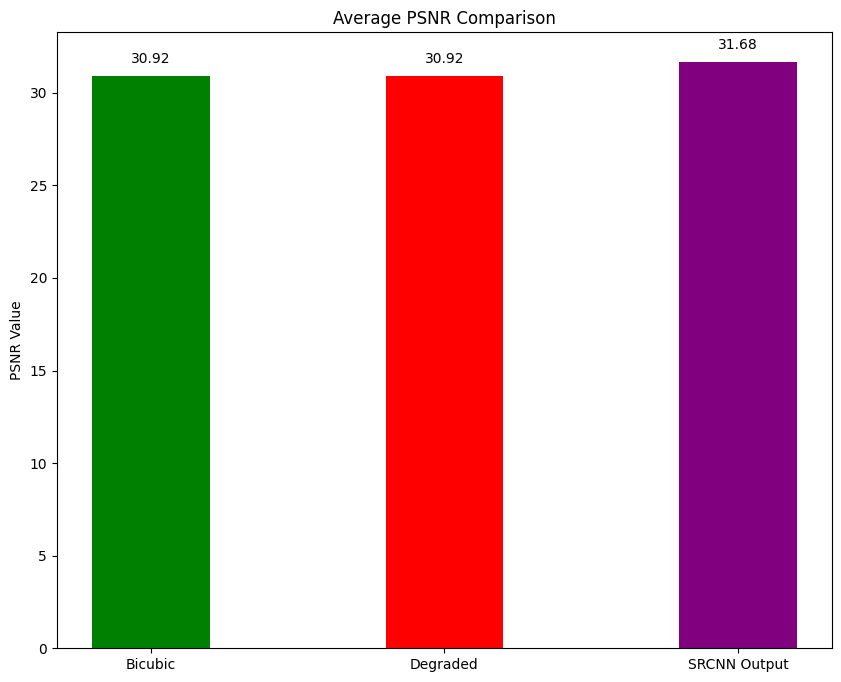

In [ ]:

# Duyệt qua tất cả các ảnh trong thư mục 'images'
image_folder = '/content/drive/MyDrive/images'
image_files = [f for f in os.listdir(image_folder) if f.endswith('.bmp')]  # Lọc chỉ ảnh .bmp

# Danh sách để lưu PSNR của các phương pháp nội suy
psnr_cubic_list = []
psnr_degraded_list = []
psnr_output_list = []

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)


    if ref is not None and degraded is not None and output is not None:
        # Tính PSNR cho ảnh giảm chất lượng và ảnh phục hồi SRCNN
        psnr_degraded = psnr_value(degraded, ref)
        psnr_output = psnr_value(output, ref)

        # Lưu PSNR vào danh sách
        psnr_degraded_list.append(psnr_degraded)
        psnr_output_list.append(psnr_output)

        # Thực hiện nội suy với các phương pháp khác nhau
        degraded_resized_cubic = cv2.resize(degraded, (ref.shape[1], ref.shape[0]), interpolation=cv2.INTER_CUBIC)

        # Tính PSNR cho mỗi phương pháp nội suy
        psnr_cubic = psnr_value(degraded_resized_cubic, ref)

        # Lưu PSNR vào danh sách
        psnr_cubic_list.append(psnr_cubic)

    else:
        print(f"Lỗi khi tải ảnh hoặc thực hiện dự đoán cho {image_file}.")

# Sau khi duyệt qua tất cả các ảnh, tính toán PSNR trung bình cho mỗi phương pháp
avg_psnr_cubic = np.mean(psnr_cubic_list)
avg_psnr_degraded = np.mean(psnr_degraded_list)
avg_psnr_output = np.mean(psnr_output_list)

# Vẽ biểu đồ so sánh PSNR của các phương pháp nội suy và SRCNN
plt.figure(figsize=(10, 8))
labels = ['Bicubic', 'Degraded', 'SRCNN Output']
psnr_values = [avg_psnr_cubic, avg_psnr_degraded, avg_psnr_output]

bars = plt.bar(labels, psnr_values, color=['green', 'red', 'purple'],width=0.4)
plt.title('Average PSNR Comparison')
plt.ylabel('PSNR Value')

# Hiển thị giá trị PSNR trên mỗi cột trong biểu đồ
for bar, value in zip(bars, psnr_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{value:.2f}', ha='center', va='bottom')

plt.show()
